In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re
# Natural Language Tool Kit
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import cufflinks as cf
cf.go_offline()

/var/folders/rl/70187qg15jqf1pwjg83vbsqw0000gn/T/ipykernel_2237/1574010515.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd

# Load CSV file into a dataframe
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
tweets = pd.read_csv("tweets.csv")


In [3]:
tweets.shape

(1000, 2)

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Read in the dataset
tweets = pd.read_csv("tweets.csv")

# Create a new column in the dataset to store whether a tweet is related to an earthquake
tweets["earthquake"] = tweets["text"].apply(lambda x: "earthquake" in x or "quake" in x or "temblor" in x or "seismic" in x)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets["text"], tweets["earthquake"], test_size=0.2, random_state=42)

# Initialize the Tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))

# Transform the training and test sets
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.97


In [6]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Confusion Matrix
plot_cm(valid_labels,predictions, 'Confution matrix of Tweets', figsize=(7,7))

NameError: name 'valid_labels' is not defined

In [37]:
import pandas as pd

# Read in the dataset
tweets = pd.read_csv("tweets.csv")

# Create a list of keywords related to earthquakes
keywords = ["earthquake", "quake", "temblor", "seismic"]

# Create a new column in the dataset to store whether a tweet is related to an earthquake
tweets["earthquake"] = tweets["text"].apply(lambda x: any(word in x for word in keywords))

# Print out the number of tweets that are related to earthquakes
print("Number of tweets about earthquakes: ", tweets["earthquake"].sum())

# Print out the tweets that are related to earthquakes
print(tweets[tweets["earthquake"] == True]["text"])

Number of tweets about earthquakes:  47
0     USGS reports a M2.4 earthquake, 39 km W of Men...
1     USGS reports a M1.9 earthquake, 39 km W of Men...
2     USGS reports a M2.3 earthquake, western Texas ...
3     USGS reports a M2.2 earthquake, 36 km NNW of T...
5     3.5 magnitude #earthquake. 39 km from Mentone,...
6     USGS reports a M3.53 earthquake, 34 km SE of M...
7     3.2 magnitude #earthquake. 39 km from Mentone,...
8     USGS reports a M3.2 earthquake, New Mexico on ...
9     USGS reports a M2.5 earthquake, 50 km SSE of W...
10    2.5 magnitude #earthquake. 63 km from Mentone,...
11    USGS reports a M2.6 earthquake, 54 km S of Whi...
12    2.6 magnitude #earthquake. 66 km from Mentone,...
13    2.6 magnitude #earthquake. 51 km from Mentone,...
14    USGS reports a M2.6 earthquake, 50 km W of Men...
15    2.6 magnitude #earthquake. 35 km from Mentone,...
16    USGS reports a M2.6 earthquake, western Texas ...
17    USGS reports a M1.8 earthquake, 45 km NW of To...
18    2.

In [13]:
X = train_df.drop("target", axis=1)
y = train_df["target"]


In [10]:
print(f"Train data shape {train.shape}")
print(f"Test data shape {test.shape}")

Train data shape (7613, 5)
Test data shape (3263, 4)


In [16]:
missing = train_df.isnull().sum()
missing[missing>0].sort_values(ascending=False).iplot(kind='bar',
                                                      title='Null values present in train Dataset',
                                                      color=['blue'])

In [17]:
train_df.target.value_counts().iplot(kind='bar',
                                     text=['Fake', 'Real'],
                                     title='Comparing Tweet is a real disaster (1) or not (0)',
                                     color=['green'])

In [18]:
counts_train = train_df.target.value_counts(sort=False)
labels = counts_train.index
values_train = counts_train.values

data = go.Pie(labels=labels, values=values_train, pull=[0.03, 0])
layout = go.Layout(title="Comparing Tweet is a real disaster (1) or not (0) in %")
fig = go.Figure(data=[data], layout=layout)
fig.update_traces(hole=.3, hoverinfo="label+percent+value")
fig.update_layout(
    # Add annotations in the center of the donut pies
    annotations = [dict(text='Train', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

In [19]:
train_df['length'] = train_df['text'].apply(len)

data = [
    go.Box(
        y=train_df[train_df['target']==0]['length'],
        name='Fake'
    ),
    go.Box(
        y=train_df[train_df['target']==1]['length'],
        name='Real'
    )
]
layout = go.Layout(title='Comparison of text length in Tweets')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [26]:
print(f"There are {train_df.keyword.nunique()} in the train set") # Total number of unique keywords

train_df.keyword.value_counts()[:20].iplot(kind='bar', title='Top 20 keywords in text', color='red')

There are 221 in the train set


In [27]:
train_df.location.value_counts()[:20].iplot(kind='bar', title='Top 20 locations in tweet')

In [28]:
STOPWORDS.add('https')

def plot_world(text):
    comment_words = ' '
    stopwords = set(STOPWORDS)
    for val in text:
        # typecast val into string
        val = str(val)
        # split the tokens
        tokens = val.split()
        for i in range(len(tokens)):
            # converts each token into lowercase
            tokens[i] = tokens[i].lower()
        for words in tokens:
            comment_words = comment_words + words + ' '
            
    wordcloud = WordCloud(width = 5000,
                          height = 4000,
                          background_color = 'black',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)
    # plot the WordCloud image
    plt.figure(figsize=(12,12), facecolor='k', edgecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [29]:
# How many http words has this text?
train_df.loc[train_df['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [30]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

# Remove all text that start with html
train_df['text'] = train_df['text'].apply(lambda x: remove_html(x))

In [31]:
# lets check if this clean works
print(train_df.loc[train_df['text'].str.contains('http')].target.value_counts())

# remove all text that start with html in test
test_df['text'] = test_df['text'].apply(lambda x: remove_html(x))

0    1
Name: target, dtype: int64


In [32]:
# now remove stopwords, change to lowercase

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # split to array (default delimiter is " ")
    text = text.split()
    text = [w for w in text if not w in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [33]:
# apply text cleaning
train_df['text'] = train_df['text'].apply(lambda x : clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x : clean_text(x))


In [34]:
# How many unique words have this text

def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count
text_values = train_df['text']

counter = counter_word(text_values)
print(f"The len of words is: {len(counter)}")
list(counter.items())[:10]

The len of words is: 16070


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56)]

In [25]:
#Train / Valid Split

In [41]:
# The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint
max_length = 20
trunc_type = 'post'
padding_type = 'post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6200
seq_len = 12

# based on 80% of the data
training_sentences = train_df.text[0:training_size]
training_labels = train_df.target[0:training_size]

valid_sentences = train_df.text[training_size:]
valid_labels = train_df.target[training_size:]

print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',valid_sentences.shape)

The Shape of training  (6200,)
The Shape of testing (1413,)


In [42]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [43]:
# Lets see the first 10 elements
print("THe first word Index are: ")
for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))

THe first word Index are: 
 <XXX>,  1 
 t,  2 
 co,  3 
 http,  4 
 the,  5 
 a,  6 
 to,  7 
 in,  8 
 of,  9 
 and,  10 
 i,  11 
 is,  12 
 for,  13 
 on,  14 
 you,  15 


In [44]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(train_df.text[1])
print(training_sequences[1])

Forest fire near La Ronge Sask. Canada
[159, 40, 224, 766, 6047, 6048, 1476]


In [45]:
# check reverse to see how it works
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [46]:
# Lets see the first 10 elements
print("THe first reverse word Index are: ")
for x in list(reverse_word_index)[0:15]:
    print (" {},  {} ".format(x,  reverse_word_index[x]))

THe first reverse word Index are: 
 1,  <XXX> 
 2,  t 
 3,  co 
 4,  http 
 5,  the 
 6,  a 
 7,  to 
 8,  in 
 9,  of 
 10,  and 
 11,  i 
 12,  is 
 13,  for 
 14,  on 
 15,  you 


In [47]:
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
decode(training_sequences[1]) # this can be useful in checking predictions

'forest fire near la ronge sask canada'

In [48]:
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [49]:
#Creating the model

In [50]:
# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # remember this is a binary classification
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            514240    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 568,065
Trainable params: 568,065
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [57]:
import pydot

tf.keras.utils.plot_model(
    model, to_file='model_plot4a.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [52]:
start_time = time.time()

num_epochs = 40
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(valid_padded, valid_labels))

final_time = (time.time()- start_time)/60
print(f'The time in minutes: {final_time}')

Epoch 1/40
194/194 [==============================] - 16s 50ms/step - loss: 0.5453 - accuracy: 0.7219 - val_loss: 0.5084 - val_accuracy: 0.7459
Epoch 2/40
194/194 [==============================] - 8s 42ms/step - loss: 0.3157 - accuracy: 0.8747 - val_loss: 0.5444 - val_accuracy: 0.7622
Epoch 3/40
194/194 [==============================] - 8s 43ms/step - loss: 0.1884 - accuracy: 0.9337 - val_loss: 0.5908 - val_accuracy: 0.7544
Epoch 4/40
194/194 [==============================] - 9s 47ms/step - loss: 0.1229 - accuracy: 0.9585 - val_loss: 0.6520 - val_accuracy: 0.7459
Epoch 5/40
194/194 [==============================] - 9s 45ms/step - loss: 0.0943 - accuracy: 0.9673 - val_loss: 0.8099 - val_accuracy: 0.7289
Epoch 6/40
194/194 [==============================] - 10s 50ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.8789 - val_accuracy: 0.7297
Epoch 7/40
194/194 [==============================] - 9s 47ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 1.0791 - val_accuracy: 0.72

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.545335,0.721936,0.508403,0.745931
1,0.315693,0.874677,0.544410,0.762208
2,0.188384,0.933710,0.590763,0.754423
3,0.122858,0.958548,0.651987,0.745931
4,0.094262,0.967258,0.809905,0.728945


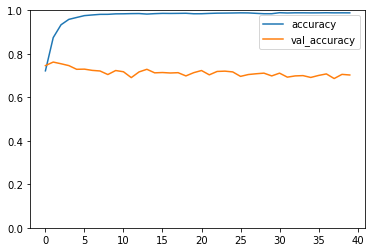

In [59]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1])

In [60]:
#Model Evaluation

In [64]:
predictions = np.argmax(model.predict(token_list),axis=1)
predictions

NameError: name 'np' is not defined

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Confusion Matrix
plot_cm(valid_labels,predictions, 'Confution matrix of Tweets', figsize=(7,7))

NameError: name 'predictions' is not defined

In [ ]:
testing_sequences2 = tokenizer.texts_to_sequences(test_df.text)
testing_padded2 = pad_sequences(testing_sequences2, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(testing_padded2)
# sample of submission

sub['target'] = (predictions > 0.5).astype(int)
sub.head()

In [ ]:
sub.to_csv("submission.csv", index=False, header=True)